In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [2]:
from fastai.vision import *
from fastai.widgets import *
from IPython.display import Image as Show
from IPython.display import display
from io import BytesIO
import warnings
warnings.filterwarnings('ignore')
import fastai
print(f'fastai: {fastai.__version__}')
print(f'cuda: {torch.cuda.is_available()}')

fastai: 1.0.59
cuda: False


In [3]:
!wget -N https://qz-aistudio-public.s3.amazonaws.com/workshops/labelling_images_data.zip --quiet
!unzip -q labelling_images_data.zip
print('Done!')

Done!


In [0]:
data_path = './data/'

In [5]:
%ls data/

imagenet_class_index.json  images/


In [6]:
%ls data/images

boat2.jpg     IMG_1454.JPG  IMG_8039.jpg  IMG_8098.JPG
IMG_1407.JPG  IMG_8027.JPG  IMG_8040.JPG  IMG_8592.JPG


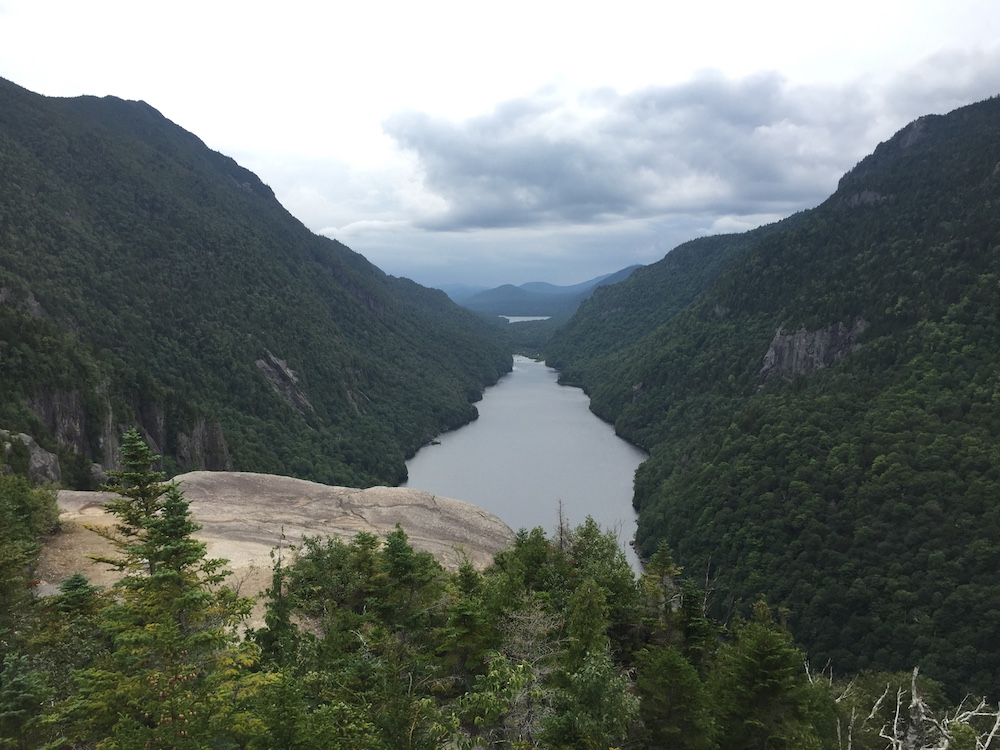

In [7]:
Show(data_path + 'images/IMG_8027.JPG', width=600)

In [0]:
json_file = json.load(open(data_path+'imagenet_class_index.json'))

classes = [json_file[str(k)][1] for k in range(len(json_file))]

In [9]:
classes[:10]

['tench',
 'goldfish',
 'great_white_shark',
 'tiger_shark',
 'hammerhead',
 'electric_ray',
 'stingray',
 'cock',
 'hen',
 'ostrich']

In [10]:
# Get weights of the model and add nn.LogSoftmax(dim=1) to the end
model_name = 'resnet50'
model = models.resnet50(pretrained=True)
model = nn.Sequential(model, nn.LogSoftmax(dim=1))

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 66.0MB/s]


In [0]:
# Transformation to apply to image before prediction (center crop)
# tfms = get_transforms() is possible too
tfms = [ [], [crop_pad()] ]

In [0]:
# Get an empty databunch with the ImageNet classes
# WARNING single_from_classes is deprecated (https://docs.fast.ai/vision.data.html#ImageDataBunch.single_from_classes)
data = ImageDataBunch.single_from_classes(data_path, classes, ds_tfms=tfms, size=224).normalize(imagenet_stats)

In [0]:
# Get the learner of the model
learn = Learner(data, model)

In [0]:
# grab an image
img = open_image(data_path + 'images/IMG_8027.JPG')

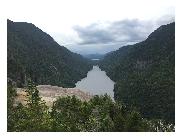

In [15]:
img.show()

In [0]:
pred_class, pred_idx, prediction_list = learn.predict(img)

In [17]:
print(pred_class)

valley


In [18]:
# this is it's confidence
print(round(float(prediction_list[pred_idx] ),2))

0.88


In [19]:
# Get the list of files
image_files = os.listdir(data_path + 'images')
print(image_files)

['IMG_1407.JPG', 'IMG_1454.JPG', 'IMG_8098.JPG', 'IMG_8027.JPG', 'IMG_8040.JPG', 'IMG_8039.jpg', 'boat2.jpg', 'IMG_8592.JPG']


In [20]:
# Loop through the list of files
for file in image_files:
    
    img = open_image(data_path + 'images/' + file)
    
    pred_class, pred_idx, prediction_list = learn.predict(img)
    confidence = str(round(float(prediction_list[pred_idx]),2))
    
    # print the file name and the category guess
    print(file, pred_class, confidence)

IMG_1407.JPG umbrella 0.61
IMG_1454.JPG marmot 0.53
IMG_8098.JPG barn 0.37
IMG_8027.JPG valley 0.88
IMG_8040.JPG beer_glass 0.54
IMG_8039.jpg stopwatch 0.86
boat2.jpg liner 0.72
IMG_8592.JPG aircraft_carrier 0.5



umbrella - confidence: 0.61 - IMG_1407.JPG


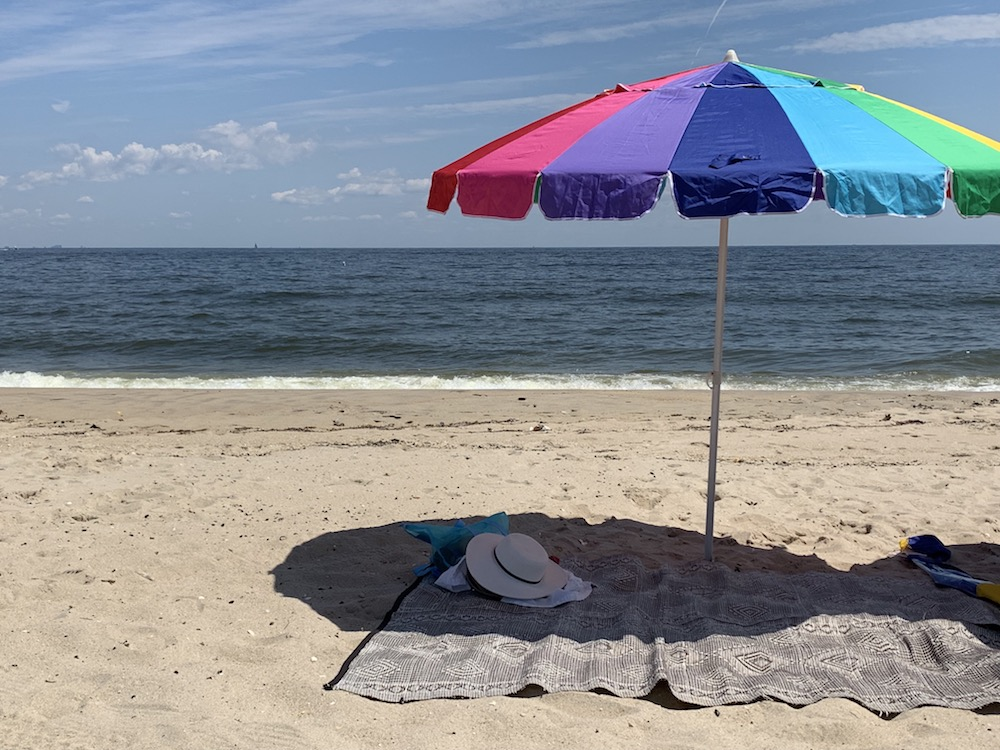


marmot - confidence: 0.53 - IMG_1454.JPG


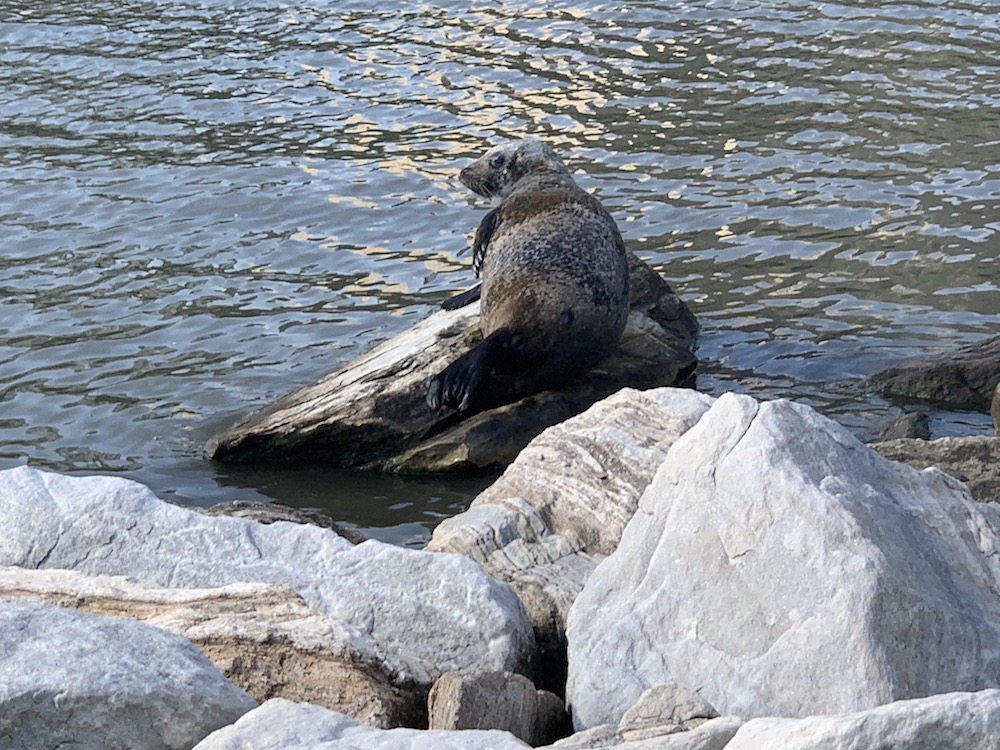


barn - confidence: 0.37 - IMG_8098.JPG


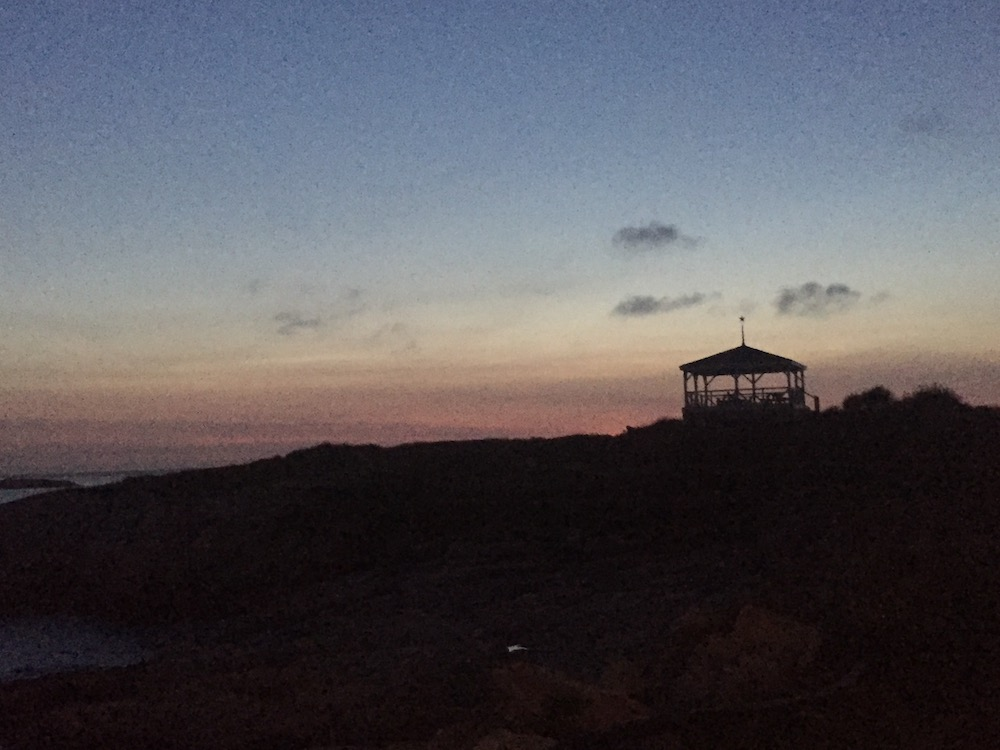


valley - confidence: 0.88 - IMG_8027.JPG


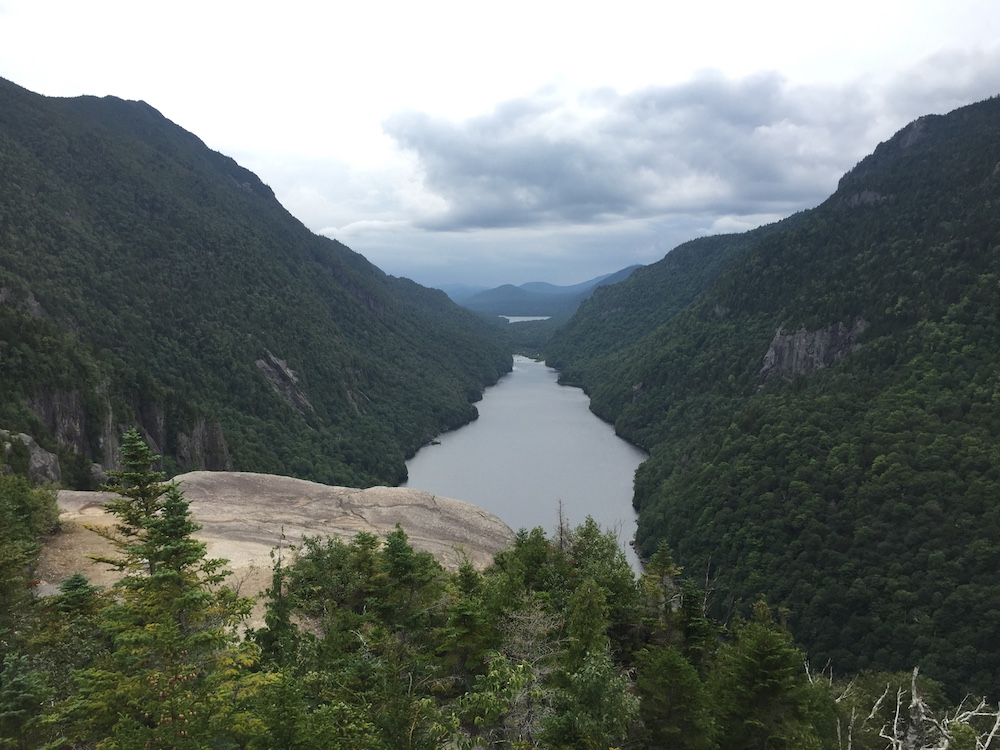


beer_glass - confidence: 0.54 - IMG_8040.JPG


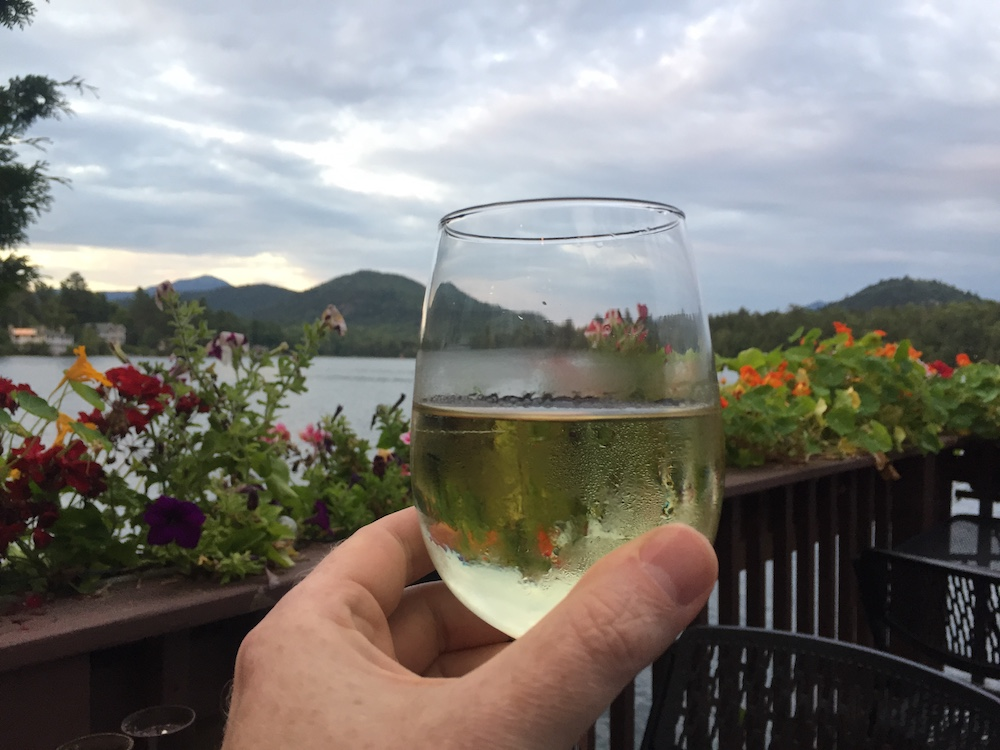


stopwatch - confidence: 0.86 - IMG_8039.jpg


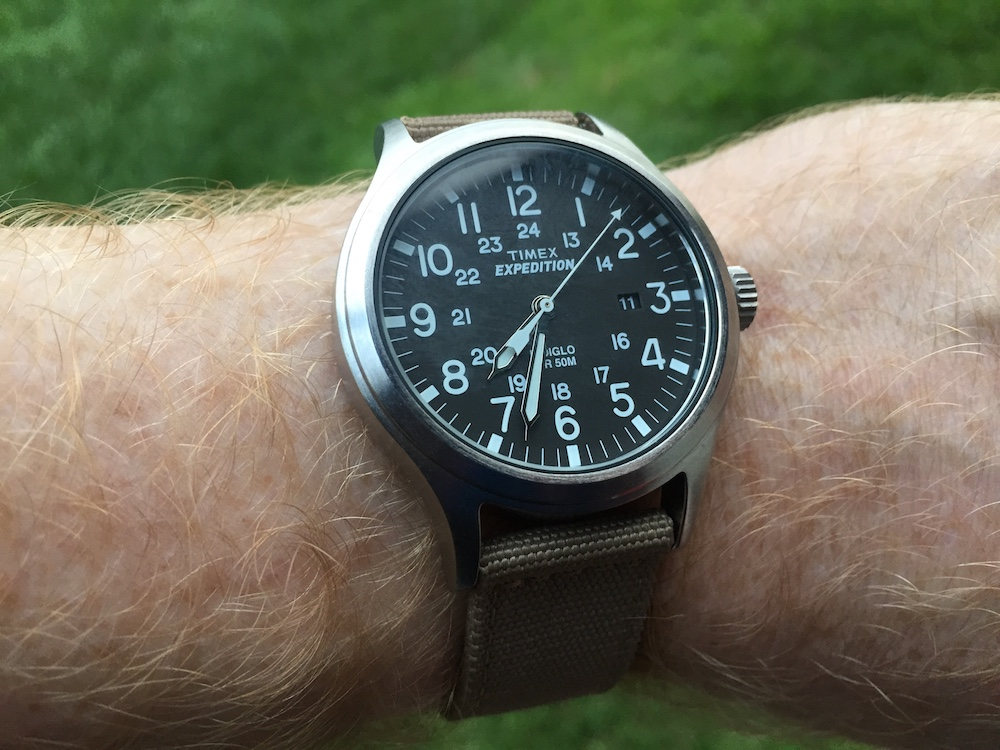


liner - confidence: 0.72 - boat2.jpg


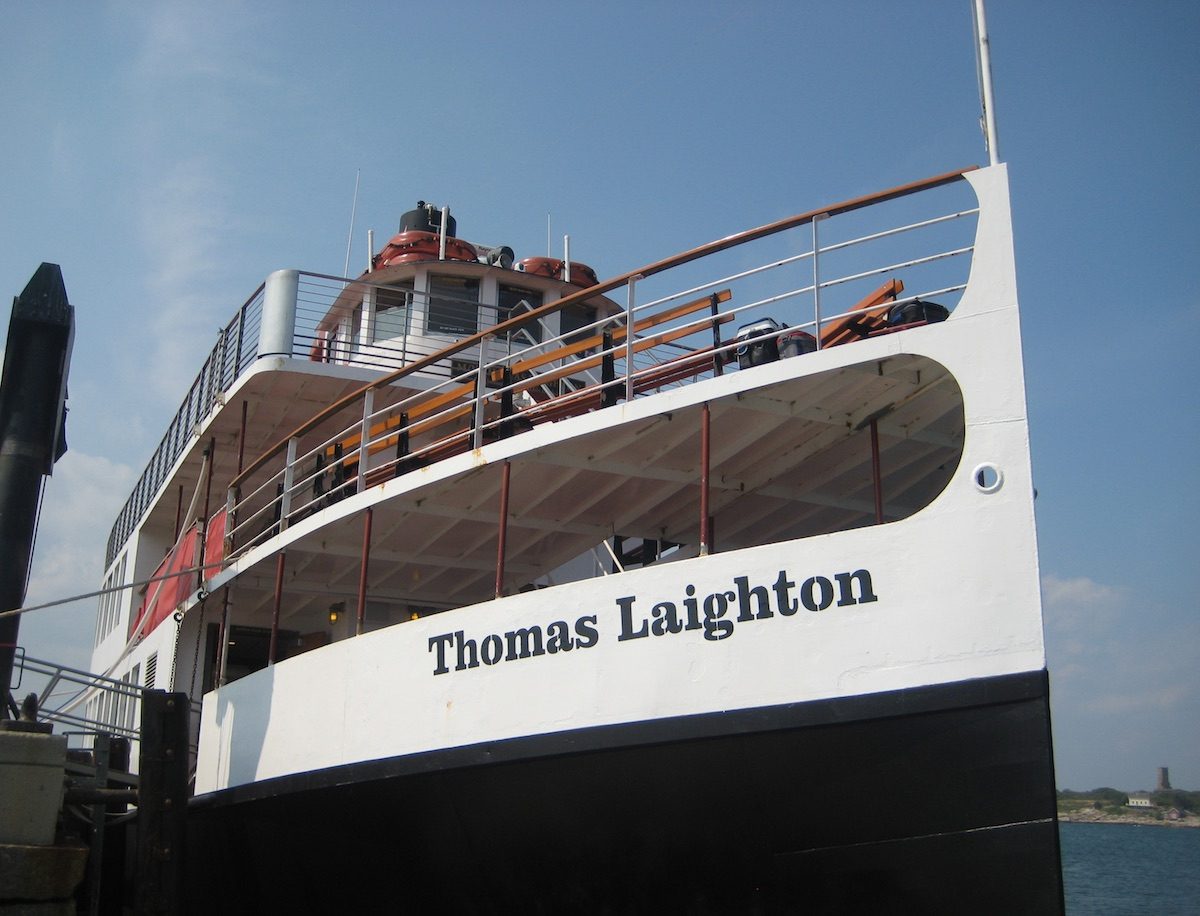


aircraft_carrier - confidence: 0.5 - IMG_8592.JPG


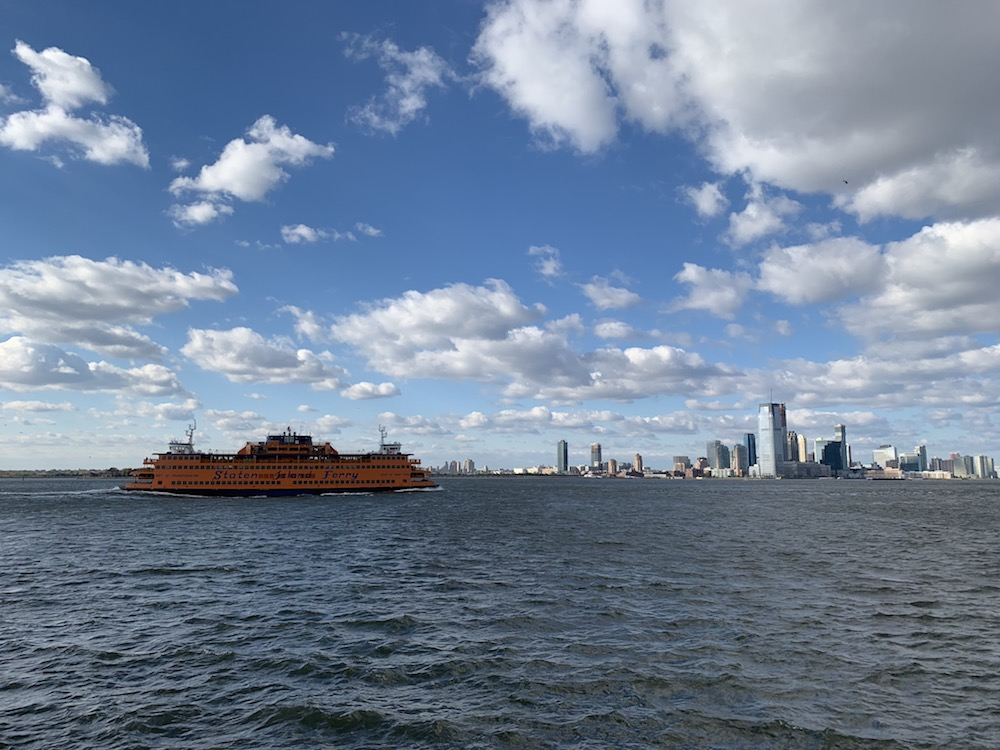

In [21]:
# Loop through the list of files
for file in image_files:
    
    image_filename = data_path + 'images/' + file
    
    img = open_image(image_filename)
    
    pred_class, pred_idx, prediction_list = learn.predict(img)
    confidence = str(round(float(prediction_list[pred_idx]),2))

    print(f'\n{str(pred_class)} - confidence: {confidence} - {file}')
    display(Show(filename=image_filename, retina=True))